In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import os
import pathlib
import glob
import PIL
import cv2
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import librosa
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dropout, Dense
#time complexity
from datetime import datetime as dt

# importing the module (space complexity)
import tracemalloc

In [2]:
x=pd.read_csv('Train_Dataset.csv')
y=pd.read_csv('Test.csv')

In [3]:
X=x.drop(['Unnamed: 0'],axis=1)
X=X.drop(['Label'],axis=1)
Y=x.Label

In [4]:
X

,Mean,Variance,Kurtosis,Skewness,contrast,dissimilarity,homogeneity,energy,asm,corr,lbp_energy,lbp_entropy,gabor_energy,gabor_entropy
0,76.231760,4712.819871,-0.340051,0.956096,354.113936,8.682226,0.320864,0.052770,0.002785,0.962600,0.177470,2.711689,0.459523,1.796579
1,46.040336,632.488213,2.677744,1.428825,86.011323,5.236742,0.340053,0.046156,0.002130,0.931821,0.160975,2.793062,0.840130,0.547466
2,93.269936,886.243823,-0.986469,-0.007312,86.631758,5.687371,0.211172,0.021494,0.000462,0.951331,0.163676,2.779284,0.363603,1.620953
3,58.825664,4488.153831,0.210797,1.183572,679.110468,14.220177,0.196731,0.040350,0.001628,0.924210,0.147412,2.871151,0.546181,1.537986
4,115.776224,2287.036132,-1.189236,-0.330537,207.722355,8.713613,0.219337,0.024084,0.000580,0.954638,0.146990,2.870426,0.252643,2.139236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,126.365264,2421.042502,-0.332296,0.363333,688.265887,15.841113,0.198119,0.035966,0.001294,0.858014,0.160511,2.821509,0.208340,2.520464
996,143.137392,1304.841907,-1.416565,-0.085593,264.182532,8.535823,0.360776,0.035814,0.001283,0.898722,0.161619,2.795602,0.219858,2.450716
997,162.455600,1628.052989,-1.126510,-0.503982,310.011097,9.938097,0.288286,0.028871,0.000834,0.904770,0.153623,2.836938,0.150188,2.814729
998,152.013376,3928.953197,-1.221884,-0.310847,544.236887,13.796565,0.198305,0.020595,0.000424,0.930854,0.147340,2.868279,0.156662,2.843006


In [5]:
X1=y.drop(['Unnamed: 0'],axis=1)
X1=X1.drop(['Label'],axis=1)
Y1=y.Label

## Data Interpretation

In [6]:
X.describe()

,Mean,Variance,Kurtosis,Skewness,contrast,dissimilarity,homogeneity,energy,asm,corr,lbp_energy,lbp_entropy,gabor_energy,gabor_entropy
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,93.733048,2642.868748,0.733380,0.648077,856.296298,16.271299,0.209545,0.034901,0.002860,0.827691,0.164459,2.796948,0.373324,1.980600
std,29.380494,1422.726603,3.216986,0.812931,811.085049,9.953324,0.148053,0.040546,0.010639,0.136146,0.032677,0.143567,0.182675,0.580882
min,7.731072,235.448935,-1.732773,-1.932783,4.856065,1.012597,0.018474,0.006470,0.000042,0.055081,0.134014,1.853628,0.138392,0.140305
25%,75.004160,1588.401448,-0.804949,0.109360,251.192722,8.346351,0.081793,0.012894,0.000166,0.753844,0.145766,2.763462,0.245075,1.693540
50%,94.535440,2407.317401,-0.191253,0.550923,628.401992,14.608024,0.173188,0.021297,0.000454,0.858553,0.154670,2.840541,0.315741,2.126790
75%,114.737316,3439.076910,0.956712,1.040606,1165.769206,22.069960,0.309232,0.040515,0.001641,0.936063,0.170113,2.887416,0.448255,2.392949
max,192.495920,10088.269830,29.378341,5.007051,5000.594435,55.530855,0.753459,0.399326,0.159461,0.996449,0.417137,2.946228,0.970602,2.922441


<AxesSubplot:>

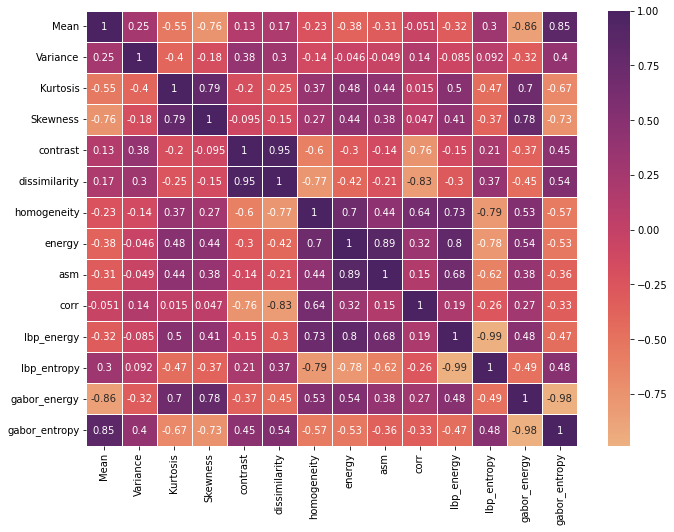

In [7]:
plt.figure(figsize=(11,8))
sns.heatmap(X.corr(),annot=True,cmap='flare', linewidths=.5 )

## Implementing a Random Forest Classifier

In [8]:
start1 = dt.now()
# starting the monitoring
tracemalloc.start()
from sklearn.ensemble import RandomForestClassifier

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.2,random_state=2,stratify=Y)

model_rf=RandomForestClassifier()

model_rf.fit(x_train,y_train)

y_pred=model_rf.predict(X_test)
y_pred

acc=metrics.accuracy_score(y_pred,Y_test)
print('Accuracy',acc)

cm=metrics.confusion_matrix(y_pred,Y_test)
print('Confusion matrix\n',cm)

# process stuff
running_secs = (dt.now() - start1).seconds
print('running time in seconds:',format(running_secs))
# displaying the memory
print('memory consumed:',tracemalloc.get_traced_memory())
 
# stopping the library
tracemalloc.stop()

Accuracy 0.94
Confusion matrix
 [[94  7]
 [ 5 94]]
running time in seconds: 3
memory consumed: (1672928, 1759924)


The output is given in form of (current, peak),i.e, current memory is the memory the code is currently using and peak memory is the maximum space the program used while executing.

## Implementing a KNN

Accuracy 0.785
Confusion matrix
 [[91 35]
 [ 8 66]]
Neighbours:1 and Accuracy=0.875
Neighbours:3 and Accuracy=0.75
Neighbours:5 and Accuracy=0.715
Neighbours:7 and Accuracy=0.695
Neighbours:9 and Accuracy=0.725
Neighbours:13 and Accuracy=0.74
Neighbours:15 and Accuracy=0.73
running time in seconds: 2
memory consumed: (1081737, 1092664)


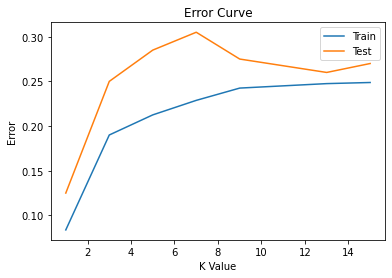

In [9]:
start2 = dt.now()
# starting the monitoring
tracemalloc.start()

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.2,random_state=2,stratify=Y)

from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier()
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)

y_pred_knn=knn.predict(X_test)
y_pred_knn

acc=metrics.accuracy_score(y_pred_knn,Y_test)
print('Accuracy',acc)
cm=metrics.confusion_matrix(y_pred_knn,Y_test)
print('Confusion matrix\n',cm)

#Plot error curves to find optimal value
error_train=[]
error_test=[]
x=[1,3,5,7,9,13,15]
for k in x:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred1=knn.predict(X_train)
  y_pred2=knn.predict(X_test)
  acc=metrics.accuracy_score(Y_test,y_pred2)
  error_train.append(np.mean(Y_train!=y_pred1))
  error_test.append(np.mean(Y_test!=y_pred2))
  print("Neighbours:{} and Accuracy={}".format(k,acc))
    
plt.plot(x,error_train,label='Train')
plt.plot(x,error_test,label='Test')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()
plt.title("Error Curve")

# process stuff
running_secs = (dt.now() - start2).seconds
print('running time in seconds:',format(running_secs))
# displaying the memory
print('memory consumed:',tracemalloc.get_traced_memory())
 
# stopping the library
tracemalloc.stop()

## Implementing ANN


In [10]:
start3 = dt.now()
# starting the monitoring
tracemalloc.start()
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

x=pd.read_csv('Train_Dataset.csv')
y=pd.read_csv('Test.csv')

X=x.drop(['Unnamed: 0'],axis=1)
X=X.drop(['Label'],axis=1)
Y=x.Label

X1=y.drop(['Unnamed: 0'],axis=1)
X1=X1.drop(['Label'],axis=1)
Y1=y.Label

X1.shape

Y1.shape

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2,stratify=Y)

X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.2,random_state=2,stratify=Y)

S=StandardScaler()
x_train=S.fit_transform(x_train)
x_test=S.fit_transform(x_test)
X_train=S.fit_transform(X_train)
X_test=S.fit_transform(X_test)

#Define the classifier

model_mlp=MLPClassifier(hidden_layer_sizes=(12,10,8,10),activation='relu',solver='sgd',batch_size=4,max_iter=370)

model_mlp.fit(x_train,y_train)

y_pred_mlp=model_mlp.predict(X_test)

cm=metrics.confusion_matrix(Y_test,y_pred_mlp)
print('Confusion Matrix:')
print(cm)

print('Accuracy:',metrics.accuracy_score(Y_test,y_pred_mlp))

# process stuff
running_secs = (dt.now() - start3).seconds
print('running time in seconds:',format(running_secs))
# displaying the memory
print('memory consumed:',tracemalloc.get_traced_memory())
 
# stopping the library
tracemalloc.stop()

Confusion Matrix:
[[87 12]
 [11 90]]
Accuracy: 0.885
running time in seconds: 105
memory consumed: (1264935, 1376060)


## Implementing a CNN

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 14, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 14, 64)            6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 14, 128)           24704     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 128)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 7, 128)            0         
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                        

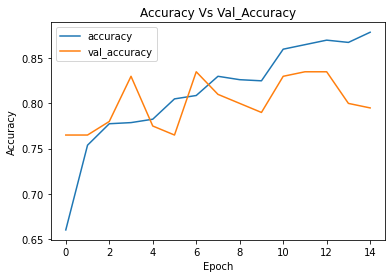

In [11]:
start4 = dt.now()
# starting the monitoring
tracemalloc.start()

x=pd.read_csv('Train_Dataset.csv')
y=pd.read_csv('Test.csv')

X=x.drop(['Unnamed: 0'],axis=1)
X=X.drop(['Label'],axis=1)
Y=x.Label

X1=y.drop(['Unnamed: 0'],axis=1)
X1=X1.drop(['Label'],axis=1)
Y1=y.Label

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3,stratify=Y)

X_train,X_test,Y_train,Y_test=train_test_split(X1,Y1,test_size=0.2,random_state=3,stratify=Y)

from sklearn.preprocessing import StandardScaler
S=StandardScaler()
x_train=S.fit_transform(x_train)
x_test=S.fit_transform(x_test)
X_train=S.fit_transform(X_train)
X_test=S.fit_transform(X_test)

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)
Y_train=le.fit_transform(Y_train)
Y_test=le.fit_transform(Y_test)

#Creating a 1D CNN Model

import tensorflow as tf
CNN=tf.keras.models.Sequential()
CNN.add(Conv1D(filters=32, kernel_size=(3,), padding='same', activation=tf.keras.layers.
                     LeakyReLU(alpha=0.001), input_shape = (x_train.shape[1],1)))
CNN.add(Conv1D(filters=64, kernel_size=(3,), padding='same', activation=tf.keras.layers.
                     LeakyReLU(alpha=0.001)))
CNN.add(Conv1D(filters=128, kernel_size=(3,), padding='same', activation=tf.keras.layers.
                     LeakyReLU(alpha=0.001)))
CNN.add(MaxPool1D(pool_size=(3,),strides=2,padding='same'))
CNN.add(Dropout(0.2))
# Flatten
CNN.add(Flatten())
CNN.add(Dense(units=256,activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
CNN.add(Dense(units=512,activation=tf.keras.layers.LeakyReLU(alpha=0.001)))
CNN.add(Dense(units=4,activation='softmax'))

CNN.summary()

CNN.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

CNN_history=CNN.fit(x_train,y_train,epochs=15,batch_size=5,validation_data=(x_test,y_test))

plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.legend(["accuracy","val_accuracy"])
plt.title('Accuracy Vs Val_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

test_loss,test_acc=CNN.evaluate(X_test,Y_test)

y_predict=CNN.predict(X_test)

y_pred=[]
for val in y_predict:
    y_pred.append(np.argmax(val))

print("Confusion matrix:\n",metrics.confusion_matrix(Y_test,y_pred))

print("Accuracy:",metrics.accuracy_score(Y_test,y_pred))

# process stuff
running_secs = (dt.now() - start4).seconds
print('running time in seconds:',format(running_secs))
# displaying the memory
print('memory consumed:',tracemalloc.get_traced_memory())
 
# stopping the library
tracemalloc.stop()


Predictions

In [12]:
model_rf.predict([[52.890496,1529.983945,1.080183905,0.819685685,117.2104677,4.331467742,0.357012895,0.038478483,0.001480594,0.961584714,0.160423092,2.785424771,0.6945192,0.890567709
]])

array(['Fire'], dtype=object)

In [13]:
knn.predict([[85.863676,3967.240762,0.124394413,0.959895991,2048.553168,27.44821397,0.084828856,0.011934396,0.00014243,0.742031259,0.156446973,2.842653742,0.373609223,2.06753517
]])

array(['Non_Fire'], dtype=object)

In [14]:
model_mlp.predict([[90.673648,2515.91079,1.509728721,1.39742055,997.0876129,19.75922581,0.081354084,0.013033975,0.000169884,0.802781785,0.139560449,2.91856642,0.366415132,1.990888294
]])

array(['Fire'], dtype='<U8')

In [15]:
CNN.predict([[90.673648,2515.91079,1.509728721,1.39742055,997.0876129,19.75922581,0.081354084,0.013033975,0.000169884,0.802781785,0.139560449,2.91856642,0.366415132,1.990888294
]])

array([[1., 0., 0., 0.]], dtype=float32)